In [14]:
%matplotlib inline
from numpy import linalg as LA
from sympy import * 
from typing import List, Dict, Iterable, Tuple, Callable
from matplotlib import pyplot as plt
from collections import Counter
# from IPython import qt
from matplotlib.pyplot import figure
from py.xml import raw
from requests.api import get
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import math 
import pandas as pd
import sys
import os
import string
import urllib.request
import requests
import curl
import pycurl
import webbrowser
#import mypy
import numpy as np
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(precision=3)



In [15]:
# Orthonormal vectors n, u, <n,u>=0
r = 2.5               # Radius
C = np.array([3,3,4])    # Center
# theta = 45/180*np.pi     # Azimuth
# phi   = -30/180*np.pi    # Zenith
theta = 30/180*np.pi     # Azimuth
phi   = 30/180*np.pi    # Zenith
n = np.array([np.cos(phi)*np.sin(theta), np.sin(phi)*np.sin(theta), np.cos(theta)])
u = np.array([-np.sin(phi), np.cos(phi), 0])
size = 500
t = np.linspace(0, 1*np.pi, size)
# P(t) = r*cos(t)*u + r*sin(t)*(n x u) + C
P = r*np.cos(t)[:,np.newaxis]*u + r*np.sin(t)[:,np.newaxis]*np.cross(n,u)

x0 = P[:,0]
y0 = P[:,1]
z0 = P[:,2]

# With Noise
P_noise = P +  np.random.normal(size=P.shape) * 0.1
x = P_noise[:,0]
y = P_noise[:,1]
z = P_noise[:,2]
# Sphere input size
sphere_size = np.size(x)

# Array lengths
leng = len(x)

In [16]:
# Create linear equation

# Design Matrices
mat_A = np.ones((3,3))
mat_B = np.ones((3,1))

# Update matrices
# Initialize terms
a_00 = x[0] ** 2
a_01 = x[0] * y[0]
a_02 = x[0]
a_10 = x[0] * y[0]
a_11 = y[0] ** 2
a_12 = y[0]
a_20 = x[0]
a_21 = y[0]
b_0 = x[0] * z[0]
b_1 = y[0] * z[0]
b_2 = z[0]
for i in range(0,len(x)):
    mat_A[0][0] = a_00 + x[i] ** 2
    a_00 = mat_A[0][0]
    mat_A[0][1] = a_01 + (x[i] * y[i])
    a_01 = mat_A[0][1]
    mat_A[0][2] = a_02 + x[i]
    a_02 = mat_A[0][2]
    mat_A[1][0] = a_10 + (x[i] * y[i])
    a_10 = mat_A[1][0]
    mat_A[1][1] = a_11 + (y[i] ** 2)
    a_11 = mat_A[1][1]
    mat_A[1][2] = a_12 + y[i]
    a_12 = mat_A[1][2]
    mat_A[2][0] = a_20 + (x[i])
    a_20 = mat_A[2][0]
    mat_A[2][1] = a_21 + (y[i])
    a_21 = mat_A[2][1]
    mat_A[2][2] = len(x)
    mat_B[0][0] = b_0 + (x[i] * z[i])
    b_0 = mat_B[0][0]
    mat_B[1][0] = b_1 + (y[i] * z[i])
    b_1 = mat_B[1][0]
    mat_B[2][0] = b_2 + (z[i])
    b_2 = mat_B[2][0]



In [17]:
# Create linear equation

# Design Matrices
mat_A = np.ones((3,3))
mat_B = np.ones((3,1))

# Update matrices
# Initialize terms
a_00 = x[0] ** 2
a_01 = x[0] * y[0]
a_02 = x[0]
a_10 = x[0] * y[0]
a_11 = y[0] ** 2
a_12 = y[0]
a_20 = x[0]
a_21 = y[0]
b_0 = x[0] * z[0]
b_1 = y[0] * z[0]
b_2 = z[0]
for i in range(0,len(x)):
    mat_A[0][0] = a_00 + x[i] ** 2
    a_00 = mat_A[0][0]
    mat_A[0][1] = a_01 + (x[i] * y[i])
    a_01 = mat_A[0][1]
    mat_A[0][2] = a_02 + x[i]
    a_02 = mat_A[0][2]
    mat_A[1][0] = a_10 + (x[i] * y[i])
    a_10 = mat_A[1][0]
    mat_A[1][1] = a_11 + (y[i] ** 2)
    a_11 = mat_A[1][1]
    mat_A[1][2] = a_12 + y[i]
    a_12 = mat_A[1][2]
    mat_A[2][0] = a_20 + (x[i])
    a_20 = mat_A[2][0]
    mat_A[2][1] = a_21 + (y[i])
    a_21 = mat_A[2][1]
    mat_A[2][2] = len(x)
    mat_B[0][0] = b_0 + (x[i] * z[i])
    b_0 = mat_B[0][0]
    mat_B[1][0] = b_1 + (y[i] * z[i])
    b_1 = mat_B[1][0]
    mat_B[2][0] = b_2 + (z[i])
    b_2 = mat_B[2][0]


In [18]:
# Coefficients

# Solve for coefficients
# lss = mat_B * np.linalg.pinv(mat_A)
lss = np.matmul(np.linalg.pinv(mat_A),mat_B)
# lss = mat_B * np.linalg.pinv(mat_A)
print(lss)
A = lss[0]
B = lss[1]
C = lss[2]

# print(x)
# x_1 = x ** 2
# print(x_1)
# print(sum(x_1))
print(mat_A)
print(mat_B)
# print(A)
# print(z)

X, Y = np.meshgrid(x, y)
zz_mesh = A*X + B*Y + C
zz_0 = A*x + B*y + C

print("A: ", A)
print("B: ", B)
print("C: ", C)

[[-0.484]
 [-0.279]
 [ 0.031]]
[[1264.628 -178.298 -592.462]
 [-178.298 1475.01  -339.694]
 [-592.462 -339.694  500.   ]]
[[-579.91 ]
 [-336.073]
 [ 396.668]]
A:  [-0.484]
B:  [-0.279]
C:  [0.031]


In [19]:
# Circle Plane

M = 10
N = size
R1 = 0
R2 = 2.5
nR = np.linspace(R1, R2, M)
nT = np.linspace(0, 2*np.pi,N)
R,T = np.meshgrid(nR, nT)

X1 = R * np.cos(T)
Y1 = R * np.sin(T)
Z = np.ones((len(T),1))
row, col = X.shape

zz_mesh_circ = A*X1 + B*Y1 + C

# print("X1 length: ", len(zz_mesh_circ))

In [20]:
# Calculate Plane properties
# X-axis
x_min = np.min(X)
x_max = np.max(X)
x_len = x_max - x_min

# Y-axis
y_min = np.min(Y)
print("Y min: ", y_min)
y_min_index = np.where(Y == y_min)
# y_min_index = Y.index(np.min(Y))
print("min Y:", y_min_index[0])
print("Yy1:", Y[24])
print("Yy2:", Y[25])
rowx1,colx1 = X.shape
print("RowX1:", rowx1)
print("ColX1: ", colx1)
# print("Xx: ", X)
y_max = np.max(Y)
y_len = y_max - y_min

# Z-axis
z_min = np.min(zz_mesh)
z_max = np.max(zz_mesh)
z_len = z_max - z_min

print(x_len)
print(y_len)
print(z_len)
# print(type(X))

Y min:  -2.662674510687416
min Y: [432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 4

In [21]:
# Angles (Rotation)

# X-axis rotation
# x_rot = math.atan(z_len/y_len)
# x_rot_deg = x_rot * (math.pi / 180)
x_rot_1 = math.atan2(z_len,y_len)
x_rot_deg = x_rot_1 * (180/math.pi)
print("X-axis rotation:", x_rot_deg)


# Y-axis rotation
# y_rot = math.atan(z_len/x_len)
# y_rot = z_len/x_len
y_rot_1 = math.atan2(z_len,x_len)
y_rot_deg = y_rot_1 * (180/math.pi)
print("Y-axis rotation:",y_rot_deg)

# Z-axis rotation
z_rot_1 = math.atan2(y_len,x_min)
z_rot_deg_0 = z_rot_1 * (180/math.pi)
z_rot_deg = 90 - z_rot_deg_0
print("Z-axis rotation:",z_rot_deg)

# Calculate Radius
radii = []
for i in range(0,M):
    rad_mesh = np.sqrt(X1[0,i] ** 2 + Y1[0,i]**2)
    radii.append(rad_mesh)
max_rad = radii.index(max(radii))
print("Maximum Radius:", max_rad)

#Error
err_r = (r*np.ones((M))-radii)
err_r = err_r.tolist()
min_err = err_r.index(min(err_r))
print("Min Error 1:", min_err)
print("Min Error 2:", min(err_r))


#%%
# Setup circle equations

# Angle: theta
theta = np.linspace(0, 2*np.pi)

# Coordinates
# Version 1
# Middle index
mid_ind = int(size/2)
rad = np.sqrt(x[mid_ind] ** 2 + y[mid_ind] ** 2)
x_c = rad * np.cos(theta)
y_c = rad * np.sin(theta)

# Version 2
print("X_c: ", x_c)


X-axis rotation: 33.74304379992081
Y-axis rotation: 39.729307434924365
Z-axis rotation: -26.48948891249607
Maximum Radius: 9
Min Error 1: 9
Min Error 2: 0.0
X_c:  [ 2.033  2.016  1.967  1.885  1.772  1.629  1.46   1.268  1.054  0.823  0.578  0.324  0.065 -0.195 -0.452 -0.702 -0.94  -1.163 -1.367 -1.548 -1.704 -1.832 -1.93  -1.996 -2.029 -2.029 -1.996 -1.93  -1.832 -1.704 -1.548 -1.367 -1.163 -0.94  -0.702 -0.452 -0.195  0.065  0.324  0.578  0.823  1.054  1.268  1.46   1.629  1.772  1.885  1.967  2.016  2.033]


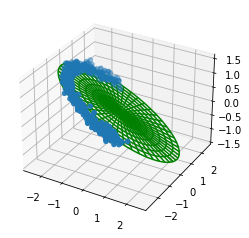

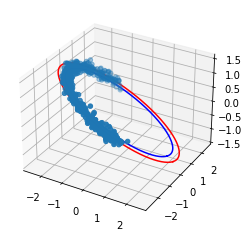

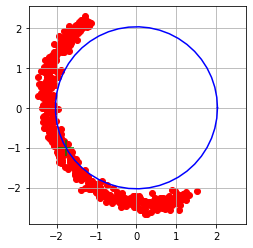

In [22]:
# Plots

plot4 = plt.figure(4)
ax = plt.axes(projection = '3d')
ax.scatter(x, y, z)
ax.plot_wireframe(X1, Y1, zz_mesh_circ, cmap = 'viridis', edgecolor = 'green')

plot6 = plt.figure(6)
ax = plt.axes(projection = '3d')
ax.scatter(x, y, z)
ax.plot(X1[:,min_err],Y1[:,min_err],zz_mesh_circ[:,min_err], color = 'red')
if min(err_r) >= 0:
    ax.plot(X1[:,min_err-1],Y1[:,min_err-1],zz_mesh_circ[:,min_err-1], color = 'blue')

plot7 = plt.figure(7)
plt.scatter(x,y, color = 'red')
plt.scatter(x[250], y[250], marker= "+", color = 'green', s = 250)
sz = int(size/2)
plt.plot(x_c, y_c, color = 'b')
plt.grid()
plt.axis('square')

# Show plots
plt.show()